# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#importing  liabraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#reading dataset
df=pd.read_excel("/content/drive/MyDrive/0.default of credit card clients.xls"  ,header=1)

#**2.understanding of business

In [ ]:
df.head()  #first five rows of data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail() # last five rows of data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#3.statistical analysis

In [ ]:
#  df.describe(include="object").T  #it gives statistical analysis of categorical data

In [ ]:
df.describe().T  #it gives statistical analysis of numerical data

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#4.Data Cleaning

In [ ]:
df.duplicated().sum()       #checking duplicated values on row wise

0

In [ ]:
#df.drop_duplicates()       # dropping duplicates values

In [ ]:
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()   #getting column wise null values count

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100    # if above 25% we remove the column and lessthan 25% fill with mean and meadian and mode

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [ ]:
# df["Gender"].fillna(df["Gender"].mode()[0])   #if column is categorical has missing value , then we fill with mode

In [ ]:
# df["salary"].fillna(df["salary"].median())  # if this numerical column has outlier we can fill with median

In [ ]:
# df["salary"].fillna(df["salary"].mean())  # if this numerical column doesnot outlier we can fill with mean

In [ ]:
#df['invoice_no'] = df['invoice_no'].astype(int)

#df['customer_id'] = df['customer_id'].astype(int)


# astype used for change of onedatatype to another datatype

In [ ]:
df.nunique()    # no.of unique items of each column wise

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
df['SEX'].unique()   #unique items of sex column

array([2, 1])

In [ ]:
df["LIMIT_BAL"].unique()


array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

#**5**.EDA

Dependent/Target variable

In [ ]:

df.rename(columns={'default payment next month' : 'Defaulter'}, inplace=True)

In [ ]:
df["Defaulter"].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

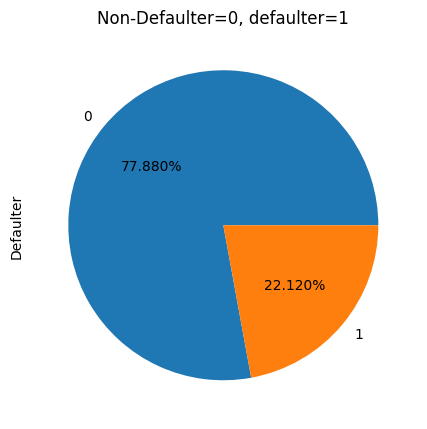

In [ ]:
df['Defaulter'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(5,6))
plt.title("Non-Defaulter=0, defaulter=1")
plt.show()


 from the above data we can conclude that

Non-defaulter were 23364, Defaulter were 6636
2.the above pie charts said Non-defaulters 77.88% ,and defaulter were 22.12%

**Independent** variables

## **Univariate** analysis

1. Categorical data

#1.bargraph

In [ ]:
#grouped_df=df['gender'].value_counts().sort_values()

#ax = grouped_df.plot(kind='bar',color={"red","blue"})


#for i in ax.containers:
    #ax.bar_label(i, label_type='edge', fontsize=10)


#ax.set_xlabel('genders category')

#ax.set_ylabel("count of genders")

#ax.set_title('Total Number of Genders')


#plt.show()


#2.pie chart

In [ ]:
#df["category"].value_counts().plot(kind='pie',autopct='%.2f')
#plt.show()

#3.countplot

In [ ]:
#plt.figure(figsize=(8,6))

#ax = sns.countplot(x='payment_method', data=df)


#for p in ax.patches:
 #   ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()))

#plt.show()

**Credit limit balance**

In [ ]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

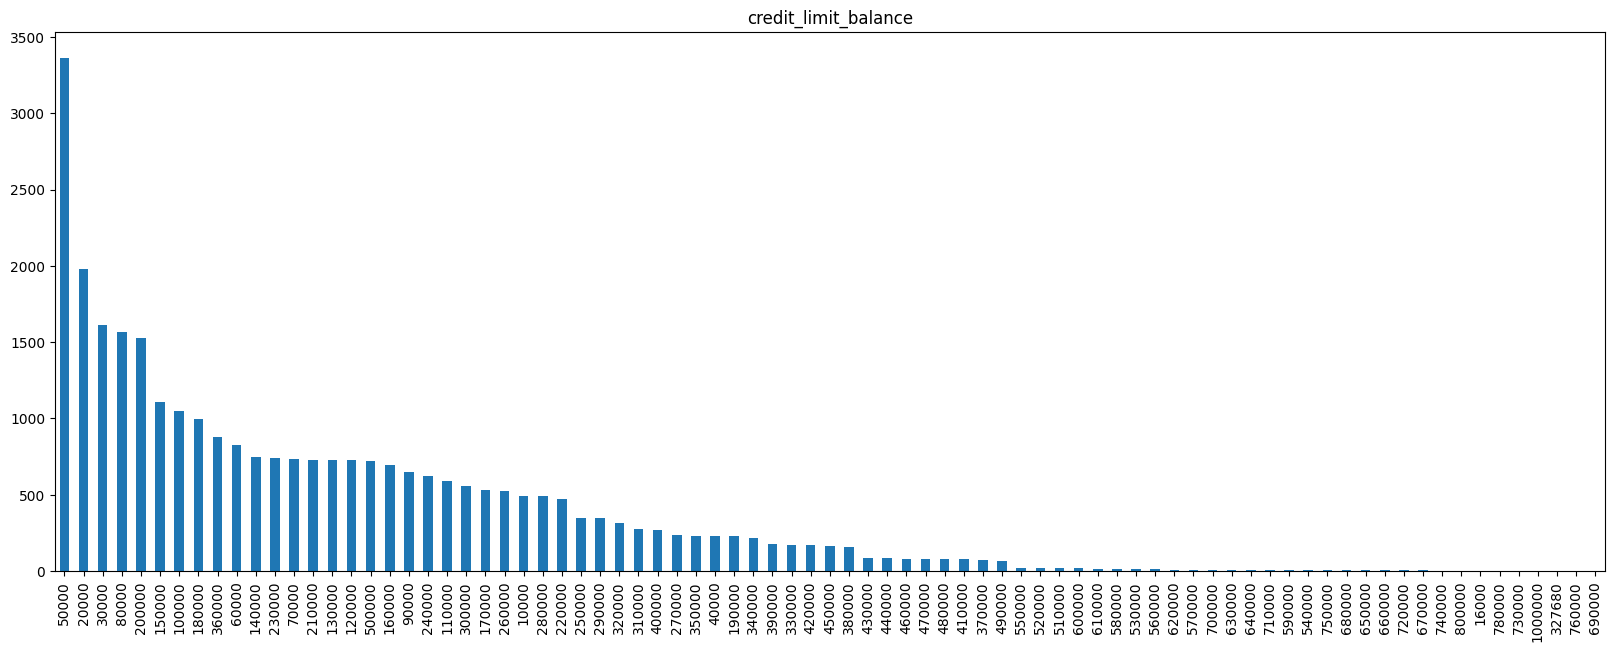

In [ ]:
plt.figure(figsize=(20,7))
df['LIMIT_BAL'].value_counts().plot(kind="bar")
plt.title("credit_limit_balance")
plt.show()

from the above data we can conclude that most of people available credit balance is 50,000 to 3365 members

maximum available credit balance limit is 1,00,000

minimum available credit balance limit is 10,000

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

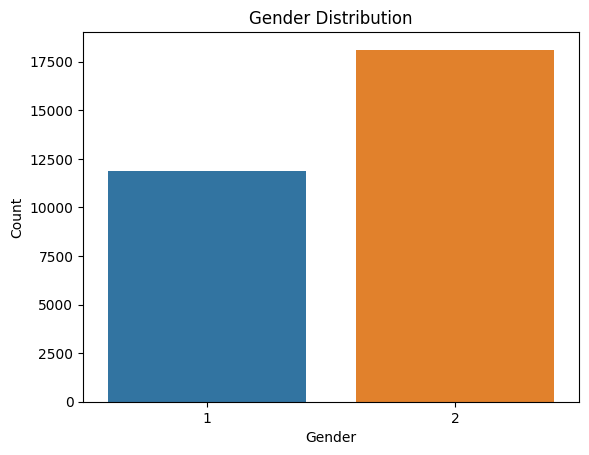

In [ ]:
sns.countplot(x='SEX', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


from the above data we can conclude that male are 11,888 represented as 1 and female are 18,112 represented as 2

#Education

1 = graduate school,

2 = university,

3 = high school,

0 = others

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In descption of dataset said except 1,2,3 any other number taken count as 0 so in our data of education others data also available number as 4,5,6 so all this numbers convert into as 0 only

In [ ]:
df["EDUCATION"]=df["EDUCATION"].replace({4:0,5:0,6:0})

In [ ]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

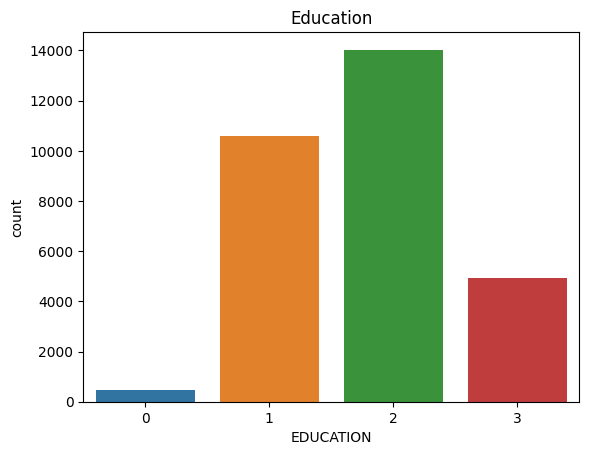

In [ ]:
sns.countplot(x='EDUCATION',data=df)
plt.title("Education")
plt.show()

From the above data we can conclude that Education in
1. University by 14,030 people

2. graduate school by 10,585 people

3. graduate school by 4917 people

4. other studying by 468 people

#MARRIAGE

Married = 1

Singles = 2

others = 3

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

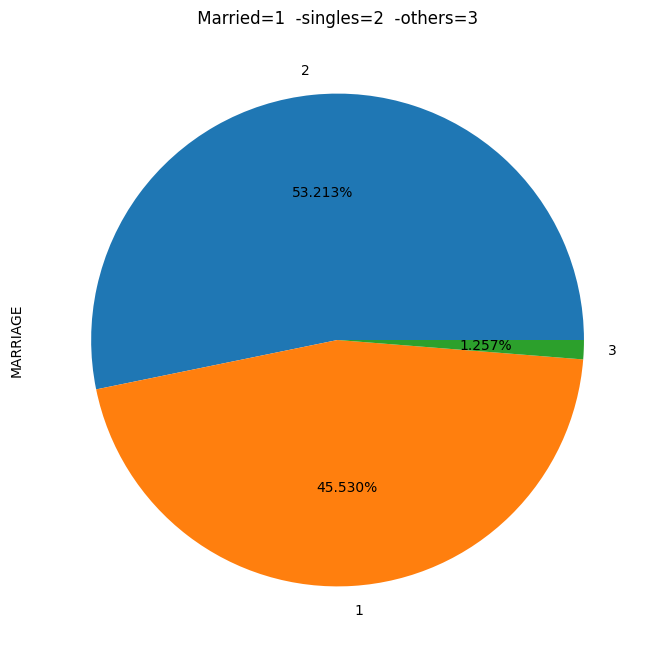

In [ ]:
df['MARRIAGE'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(8,8))
plt.title(" Married=1  -singles=2  -others=3 ")
plt.show()


From the above pie chart we can say that

married people were 45.53%
2.singles were 53.213%

3.others were 1.257%

#Age

In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

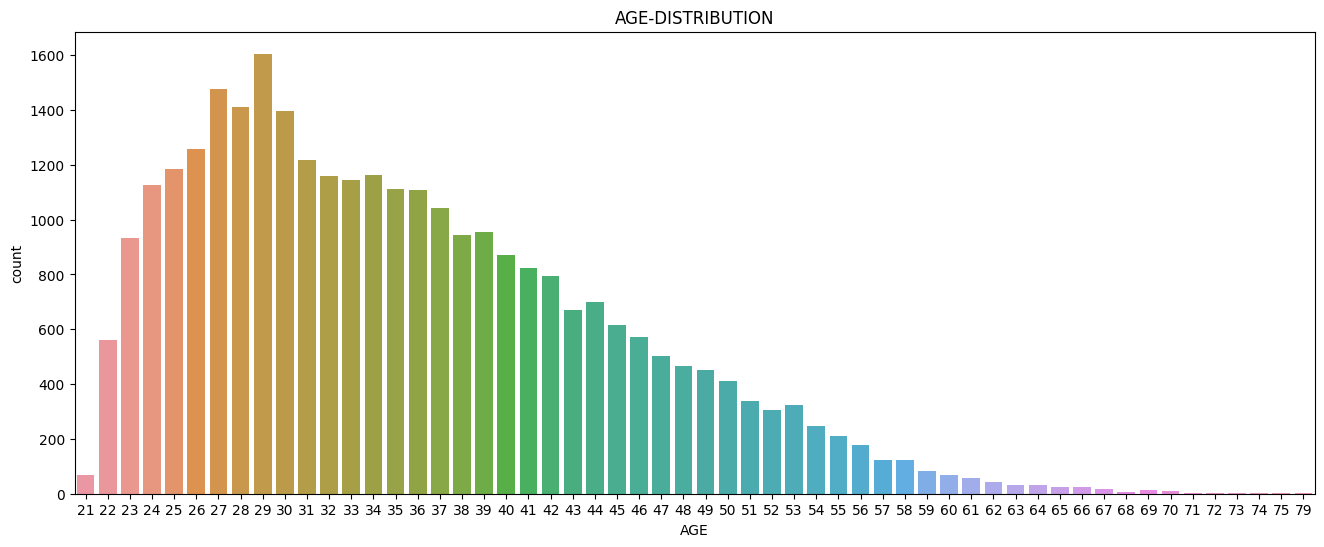

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='AGE',data=df)
plt.title("AGE-DISTRIBUTION")
plt.show()


In [ ]:

# renameing column Names


df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


#previous payments

In [ ]:
df.groupby(['PAY_SEPT','Defaulter']).size()

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
df.groupby(['PAY_MAY','Defaulter']).size()

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

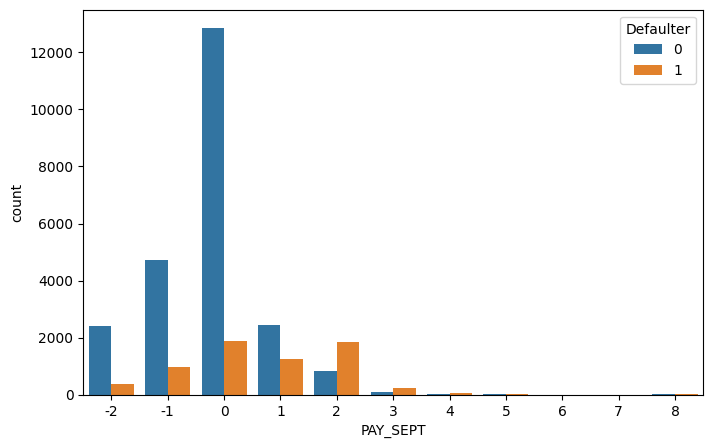

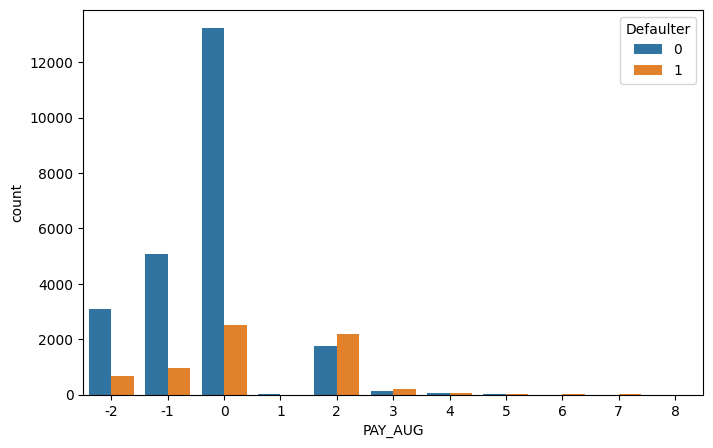

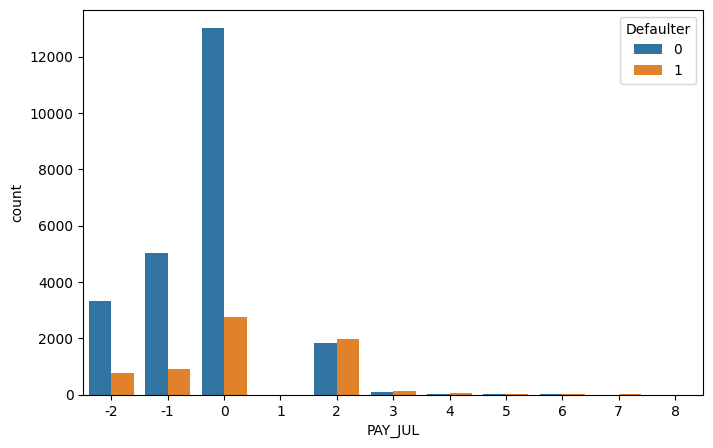

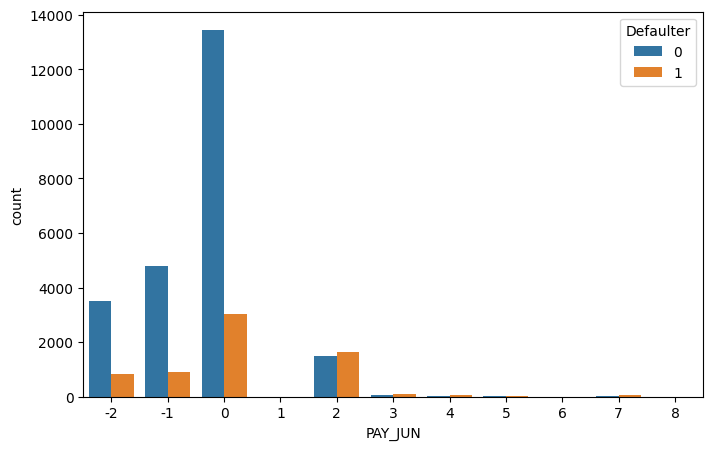

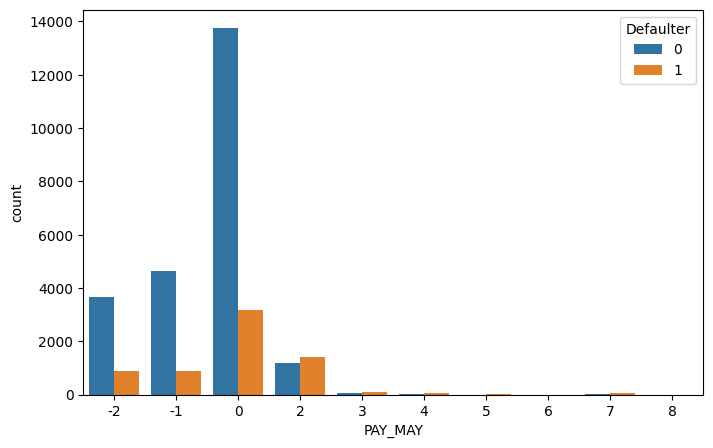

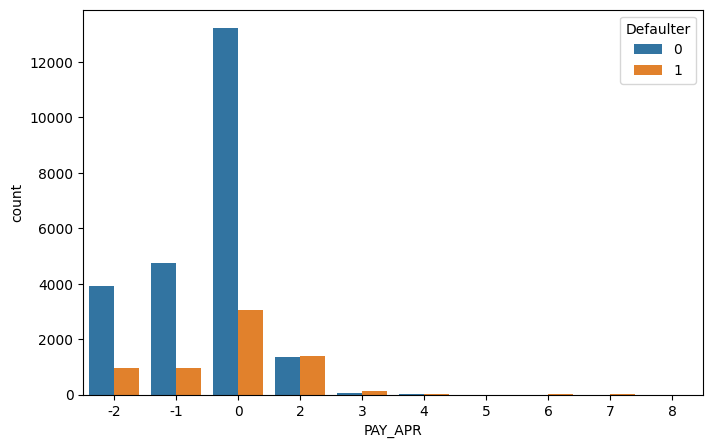

In [ ]:
payment=["PAY_SEPT",   "PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR"]

for col in payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col, hue="Defaulter" , data= df)

From the above data we can conclude that

PAY_SEPT:

In the payment of september month single rupee not recieve from Non-defaulters were 2394 persons, and from defaulters were 365 persons
Full amount received from Non-defaulters were 4732 persons and defaulters were 954 persons
Minmum amount recevied from Non- defaulters were 12,849 persons and Defaulters were 1888 persons
PAY_AUG:

In the payment of september month single rupee not recieve from Non-defaulters were 3,091 persons, and from defaulters were 691 persons
Full amount received from Non-defaulters were 5,084 persons and defaulters were 966 persons
Minmum amount recevied from Non- defaulters were 13,227 persons and Defaulters were 2,503 persons
PAY_JUL

In the payment of september month single rupee not recieve from Non-defaulters were 3328 persons, and from defaulters were 757 persons
Full amount received from Non-defaulters were 5012 persons and defaulters were 926 persons
Minmum amount recevied from Non- defaulters were 13,013 persons and Defaulters were 2,751 persons
PAY_JUN

In the payment of september month single rupee not recieve from Non-defaulters were 3,511 persons, and from defaulters were 837persons
Full amount received from Non-defaulters were 4,783 persons and defaulters were 904 persons
Minmum amount recevied from Non- defaulters were 13,439persons and Defaulters were 3,016persons
PAY_MAY

In the payment of september month single rupee not recieve from Non-defaulters were 3,651persons, and from defaulters were 895persons
Full amount received from Non-defaulters were 4,642 persons and defaulters were 897 persons
Minmum amount recevied from Non- defaulters were 13,752persons and Defaulters were 3,195persons
PAY_APR

In the payment of september month single rupee not recieve from Non-defaulters were 3,914persons, and from defaulters were 981persons

Full amount received from Non-defaulters were 4,765 persons and defaulters were 975 persons

Minmum amount recevied from Non- defaulters were 13,217persons and Defaulters were 3,069persons

COMMON POINT Representing others numbers like 1,2,3,4,5,6,7,8 Delaying payment in months

The distribution of amount of previous payment for each month.

#Bivariate analysis

#Defaulters vs sex

In [ ]:
df.groupby(['SEX','Defaulter']).size()

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

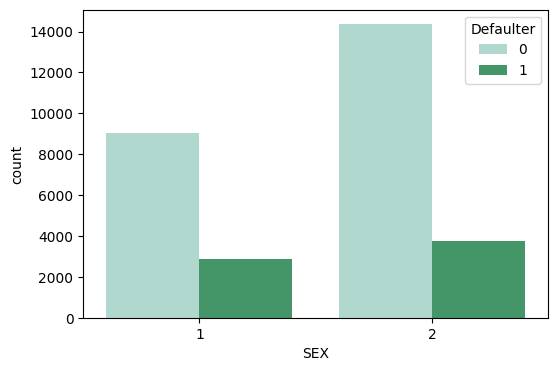

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX',hue='Defaulter',data=df,palette='BuGn')
plt.show()

From the above figure we can conclude that defaultres were females, their number was 3763 and Height Non- defaultrs also famales it's number 14,349

#EDUCATION VS Defaulters

In [ ]:
df.groupby(['EDUCATION','Defaulter']).size()

EDUCATION  Defaulter
0          0              435
           1               33
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
dtype: int64

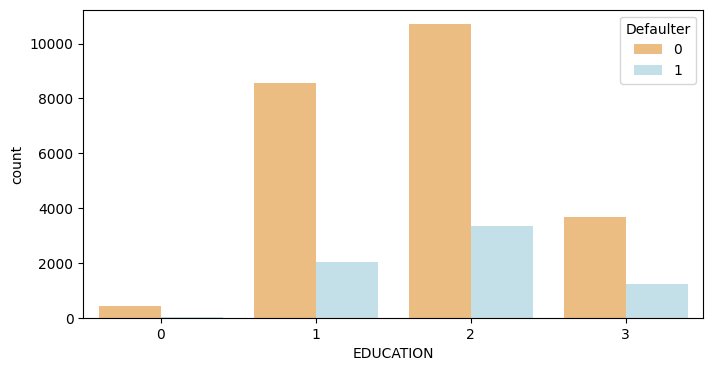

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='EDUCATION',hue='Defaulter',data=df,palette='RdYlBu')
plt.show()

From the above data we can conclude that most of the defaulters who did study in University people its number was 3,330 and after that graduate school people are defaulter their number was 2036


#MARRIAGE PEOPLE VS Defaulter

In [ ]:
df.groupby(['MARRIAGE','Defaulter']).size()

MARRIAGE  Defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64

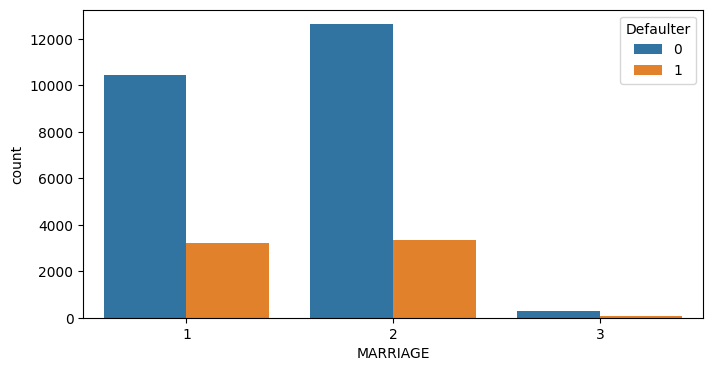

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='MARRIAGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that most of the defaulters were singles their numbers was 3341 and defaulters in married people were 3206 and defaulters in others were 89

#AGE VS Defaulter

In [ ]:
df.groupby(['AGE','Defaulter']).size()

AGE  Defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

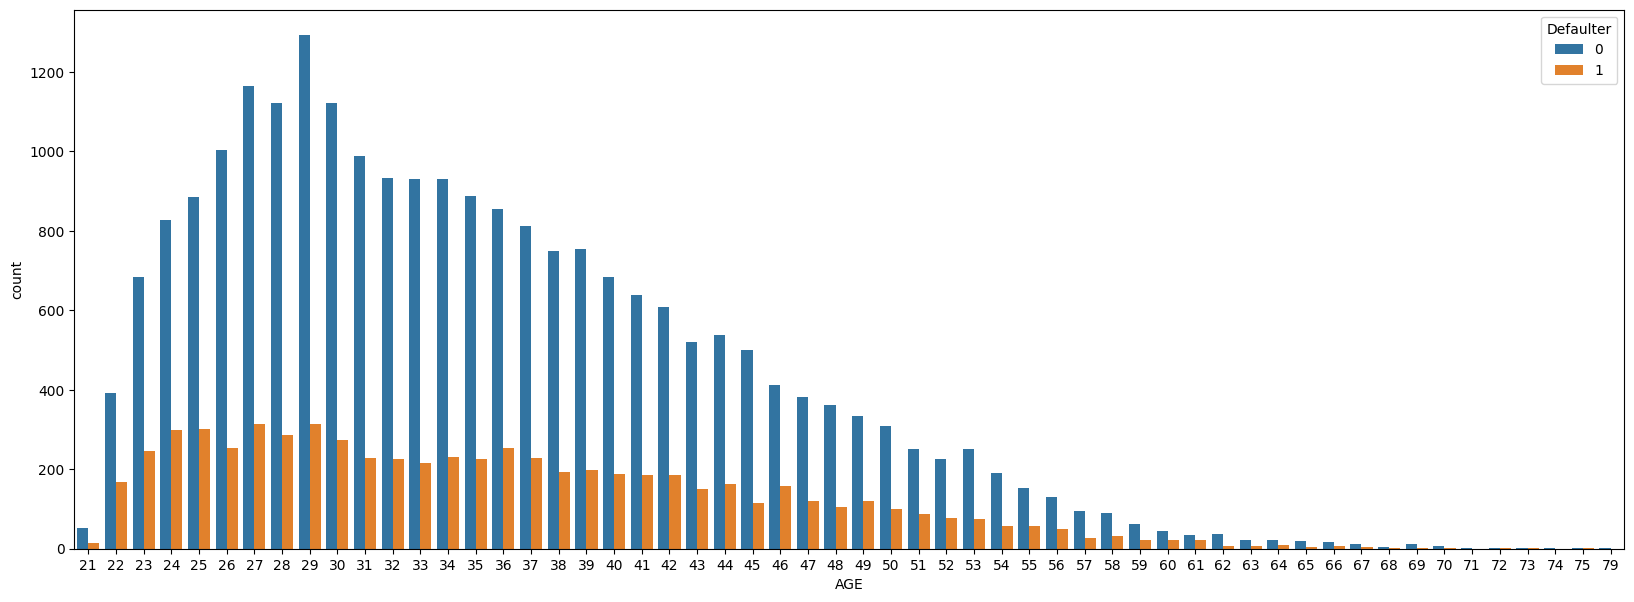

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='AGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that

1.most of the 27th age people defaulters

2.least defaulters were above 60age people were defaulters

In [ ]:
df.corr().T

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
ID,1.000000,0.026179,0.018497,0.013198,-0.028208,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.245297,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.008144,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.013198,-0.245297,0.008144,1.000000,-0.133203,0.180332,0.132036,0.155089,0.148547,0.140184,...,-0.020524,-0.020748,-0.015250,-0.045016,-0.041682,-0.060422,-0.042594,-0.051162,-0.055922,0.065685
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.133203,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.180332,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_SEPT,-0.030575,-0.271214,-0.057643,0.132036,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_AUG,-0.011215,-0.296382,-0.070771,0.155089,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_JUL,-0.018494,-0.286123,-0.066096,0.148547,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_JUN,-0.002735,-0.267460,-0.060173,0.140184,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


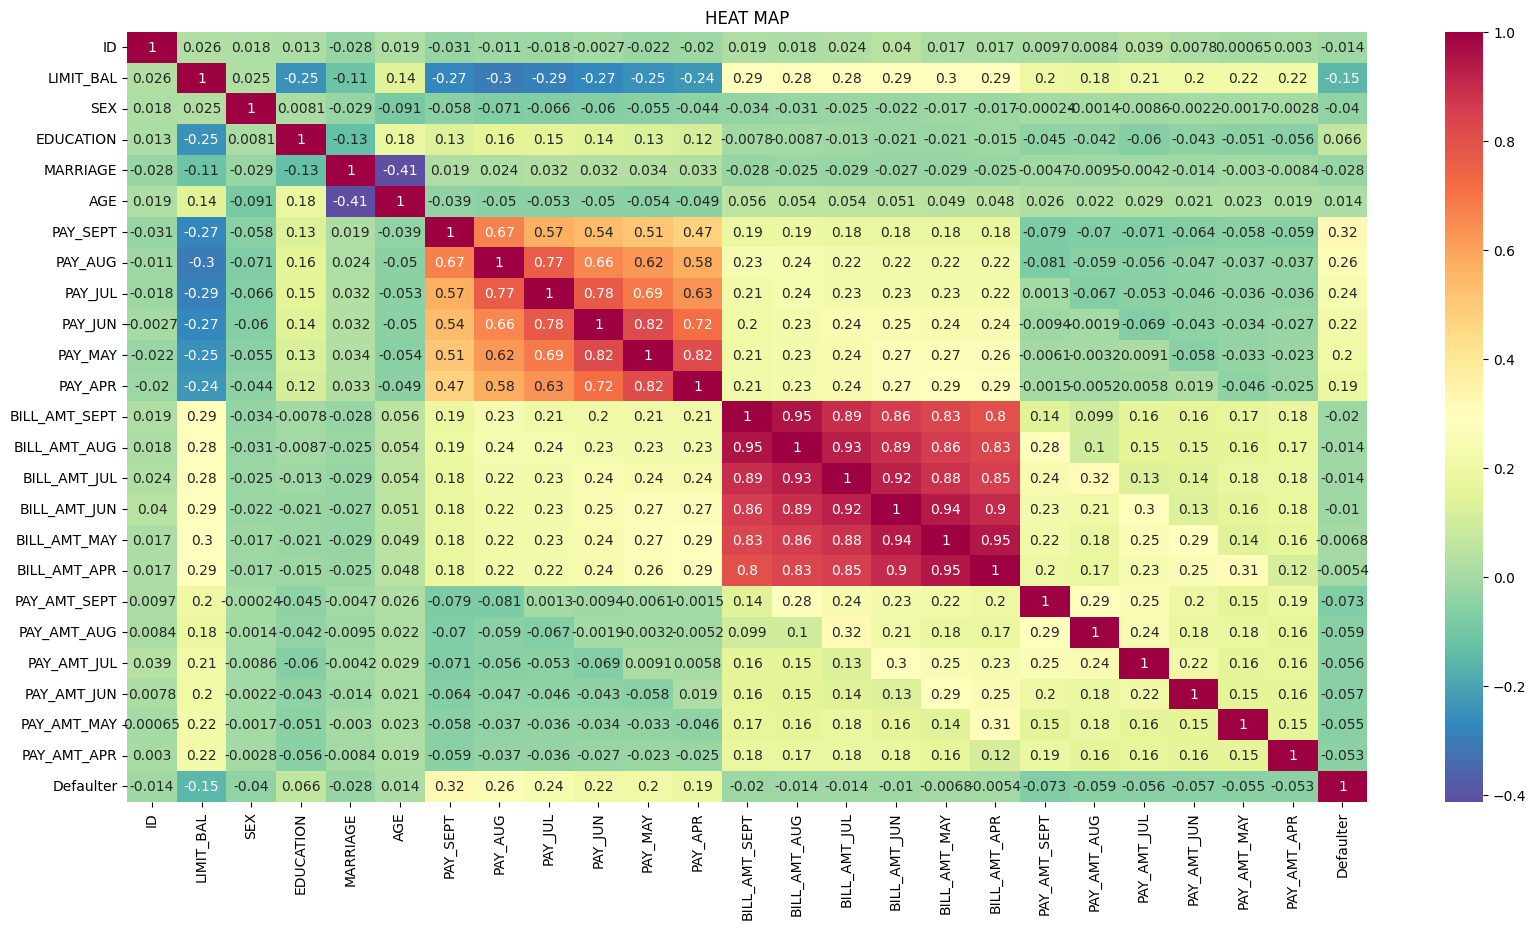

In [ ]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [ ]:
# dropping unimportant column of ID
df.drop(['ID'], axis=1, inplace=True)

#feature engineering


In [ ]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df.head(1)




,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in["Defaulter","BILL_AMT2"]]])

,variables,VIF
0,LIMIT_BAL,4.035739
1,SEX,9.116464
2,EDUCATION,7.302334
3,MARRIAGE,6.359906
4,AGE,11.188501
5,PAY_SEPT,1.918405
6,PAY_AUG,3.213058
7,PAY_JUL,3.728362
8,PAY_JUN,4.440294
9,PAY_MAY,4.985518


In [ ]:
# finding multicollinear and dropout that value

calc_vif(df[[i for i in df.describe().columns if i not in ["Defaulter","BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE","SEX"]]])

,variables,VIF
0,LIMIT_BAL,3.382428
1,EDUCATION,4.063445
2,MARRIAGE,4.610934
3,PAY_SEPT,1.915818
4,PAY_AUG,3.207627
5,PAY_JUL,3.705296
6,PAY_JUN,4.426827
7,PAY_MAY,4.961614
8,PAY_APR,3.452609
9,BILL_AMT_SEPT,4.621013


In [ ]:
df.drop(["BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE","SEX" ],axis=1,inplace=True)

In [ ]:
df.head(2)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,20000,2,1,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0,1
1,120000,2,2,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,1


In [ ]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

In [ ]:
# selected features

numerical_features=["LIMIT_BAL","EDUCATION","MARRIAGE","PAY_SEPT","PAY_AUG","PAY_JUL","PAY_JUN","PAY_MAY","PAY_APR","BILL_AMT_SEPT","BILL_AMT_APR","PAY_AMT_SEPT","PAY_AMT_AUG","PAY_AMT_JUL","PAY_AMT_JUN","PAY_AMT_MAY","PAY_AMT_APR"]

In [ ]:
# features

features=numerical_features.copy()

In [ ]:
# extending of features  means adding categorical varibales
#features = numerical_features.copy()
#features.extend(["Gender","Company Type","WFH Setup Available"])

**label encoding

In [ ]:
# importig label encoder and convert categorical to numberical


#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#for i in df.columns:
 #   if df[i].dtype=="object":
  #      df[i]=le.fit_transform(df[i])


In [ ]:
# these are selected features only
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR']

In [ ]:
# copying of data in another variable
df_pr=df.copy()
df_pr

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,20000,2,1,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0,1
1,120000,2,2,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,0,0,0,0,0,0,188948,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,3,2,-1,-1,-1,-1,0,0,1683,0,1837,3526,8998,129,0,0,0
29997,30000,2,2,4,3,2,-1,0,0,3565,19357,0,0,22000,4200,2000,3100,1
29998,80000,3,1,1,-1,0,0,0,-1,-1645,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# all features store into Variable X
X=df_pr[features]
X

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,20000,2,1,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0
1,120000,2,2,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000
2,90000,2,2,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,0,0,0,0,0,0,188948,15980,8500,20000,5003,3047,5000,1000
29996,150000,3,2,-1,-1,-1,-1,0,0,1683,0,1837,3526,8998,129,0,0
29997,30000,2,2,4,3,2,-1,0,0,3565,19357,0,0,22000,4200,2000,3100
29998,80000,3,1,1,-1,0,0,0,-1,-1645,48944,85900,3409,1178,1926,52964,1804


In [ ]:

from sklearn.preprocessing import RobustScaler
# Scalling of features
scaler = RobustScaler()

# Sclaing

X= scaler.fit_transform(X)

In [ ]:
X

array([[-0.63157895,  0.        , -1.        , ..., -0.40352411,
        -0.3969304 , -0.38637388],
       [-0.10526316,  0.        ,  0.        , ..., -0.13450804,
        -0.3969304 ,  0.12879129],
       [-0.26315789,  0.        ,  0.        , ..., -0.13450804,
        -0.13231013,  0.90153906],
       ...,
       [-0.57894737,  0.        ,  0.        , ...,  0.7263434 ,
         0.13231013,  0.41213214],
       [-0.31578947,  1.        , -1.        , ...,  0.11460085,
        13.61841757,  0.07830511],
       [-0.47368421,  0.        , -1.        , ..., -0.13450804,
        -0.13231013, -0.12879129]])

In [ ]:
#dependent_variable=['Burn Rate']
#y=df_pr[dependent_variable].values

    # or

y = df_pr['Defaulter']


y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Defaulter, Length: 30000, dtype: int64

In [ ]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y)
print(X_train.shape)
print(X_test.shape)

(24000, 17)
(6000, 17)


#APPLYING SMOTE(Synthetic Minority Oversampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({1: 23364, 0: 23364})

##model evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))

  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

In [ ]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify = y_train_sm)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:

clf = LogisticRegression( max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.intercept_

array([-1.31868344])

In [ ]:
clf.coef_

array([[-0.0932692 , -0.00654696, -0.1826227 ,  0.57197086,  0.08982797,
         0.07222191,  0.03502875,  0.03504116,  0.00191407, -0.18095404,
         0.09574077, -0.04495363, -0.0308223 , -0.01849019, -0.01625129,
        -0.01328298, -0.01036764]])

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
test_preds

array([[0.81409697, 0.18590303],
       [0.9086188 , 0.0913812 ],
       [0.79842434, 0.20157566],
       ...,
       [0.80463682, 0.19536318],
       [0.96116184, 0.03883816],
       [0.85387153, 0.14612847]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.18590303, 0.0913812 , 0.20157566, ..., 0.19536318, 0.03883816,
       0.14612847])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

array([[-0.57894737, -1.        ,  0.        , ..., -0.40352411,
        -0.3969304 , -0.38637388],
       [ 1.73684211, -1.        ,  0.        , ...,  1.36014527,
         0.60121725, -0.13986734],
       [-0.31578947,  1.        ,  0.        , ..., -0.30506423,
         1.56972744, -0.38637388],
       ...,
       [-0.10526316, -1.        , -1.        , ...,  1.62835429,
         3.46308547,  0.05306201],
       [ 1.15789474, -1.        ,  0.        , ...,  1.60790907,
         1.64540884, 42.97765471],
       [ 0.21052632,  0.        ,  0.        , ...,  0.94155626,
         0.92617094,  0.90153906]])

In [ ]:
train_class_preds

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8104583333333333
The accuracy on test data is  0.8098333333333333


#with Hyper parameter tuning

In [ ]:
lr= LogisticRegression()


In [ ]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train_os, y_train_os)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
optimized_log=log_model.best_estimator_
optimized_log

LogisticRegression(C=100)

In [ ]:
log_model.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
log_model.best_score_

0.6633674354161752

In [ ]:
# model score  on training data
print(f"training_model_score:  {log_model.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {log_model.score(X_test_os,y_test_os)}")

training_model_score:  0.6639826654539618
testing_model_score:  0.675690134817034


In [ ]:
 # to predict the probability
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
y_test_pred = log_model.predict_proba(X_test_os)[:,1]

In [ ]:
y_train_pred


array([0.40071934, 0.19061701, 0.26065498, ..., 0.54348593, 0.54297715,
       0.85457509])

In [ ]:
y_test_pred

array([0.78570656, 0.27187605, 0.26050962, ..., 0.73238121, 0.53549333,
       0.07268454])

In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train_os)
y_test_class_preds = log_model.predict(X_test_os)

In [ ]:
y_test_class_preds

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
pd.DataFrame({"Actual_Values":y_test_os, "Predicted_values":y_test_class_preds})


,Actual_Values,Predicted_values
38707,1,1
26884,1,0
19454,0,0
12363,0,0
4518,0,0
...,...,...
19740,0,1
35793,1,0
32857,1,1
17947,0,1


In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds)

accuracy_score is 0.6639826654539618
 precision_score is 0.6685547734271887
recall_score is 0.6504199882296292
f1_score is 0.6593627118644068
roc_auc_score is 0.6639826654539618
confusion_matrix is [[12664  6027]
 [ 6534 12157]]
classification_report is               precision    recall  f1-score   support

           0       0.66      0.68      0.67     18691
           1       0.67      0.65      0.66     18691

    accuracy                           0.66     37382
   macro avg       0.66      0.66      0.66     37382
weighted avg       0.66      0.66      0.66     37382



[[12862  5829]
 [ 6408 12283]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

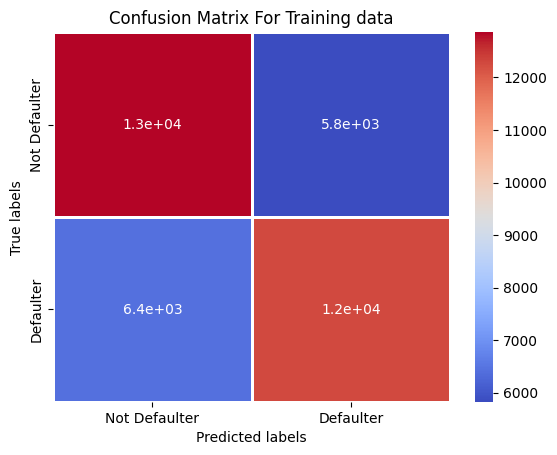

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

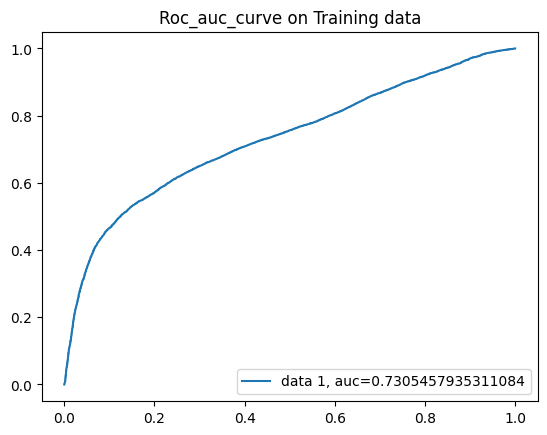

In [ ]:
# Roc_auc_curve
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_train_pred )
auc = roc_auc_score(y_train_os,  y_train_pred  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.6753691418788786
 precision_score is 0.6856172140430351
recall_score is 0.6477637491975177
f1_score is 0.6661531690140845
roc_auc_score is 0.6753691418788786
confusion_matrix is [[3285 1388]
 [1646 3027]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.70      0.68      4673
           1       0.69      0.65      0.67      4673

    accuracy                           0.68      9346
   macro avg       0.68      0.68      0.68      9346
weighted avg       0.68      0.68      0.68      9346



[[3285 1388]
 [1646 3027]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

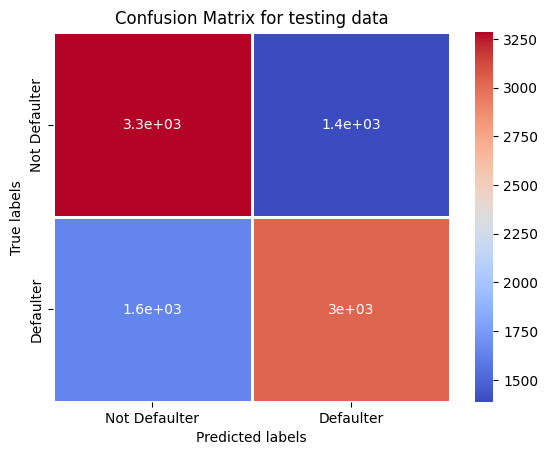

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

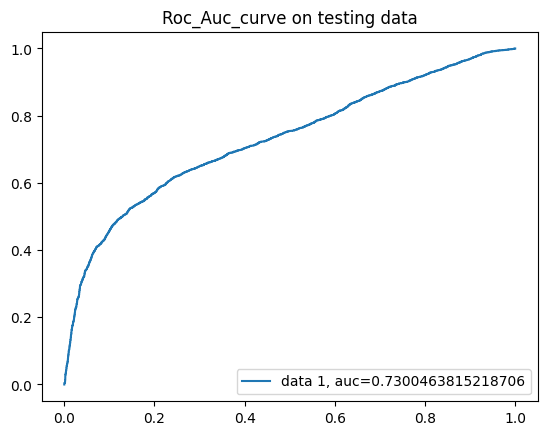

In [ ]:
# Roc_auc_curve
y_test_proba= log_model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_test_proba )
auc = roc_auc_score(y_test_os, y_test_proba )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_Auc_curve on testing data")
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting accuracy_score is approx 67%. and precision score approx is 68% and f1_score is 64%and roc_auc approx is 67% As we have imbalanced dataset, recall_score is approx 64% better parameter. Let's go ahead with other models and see if they can give better result.

#Implementing Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier()
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [ ]:
optimized_rf=rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14)

In [ ]:
rf_grid.best_score_

0.8116741814187012

In [ ]:
# model score  on training data
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.8822695414905569
testing_model_score:  0.8105071688422855


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_rf

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_rf)

accuracy_score is 0.8822695414905569
 precision_score is 0.9085658737419945
recall_score is 0.8500882777807501
f1_score is 0.8783548467342934
roc_auc_score is 0.882269541490557
confusion_matrix is [[17092  1599]
 [ 2802 15889]]
classification_report is               precision    recall  f1-score   support

           0       0.86      0.91      0.89     18691
           1       0.91      0.85      0.88     18691

    accuracy                           0.88     37382
   macro avg       0.88      0.88      0.88     37382
weighted avg       0.88      0.88      0.88     37382



[[17092  1599]
 [ 2802 15889]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

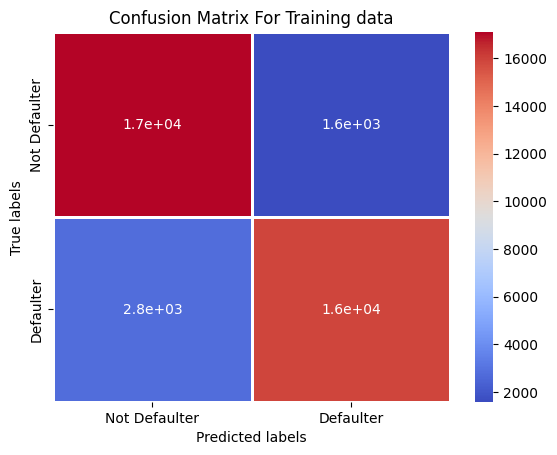

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

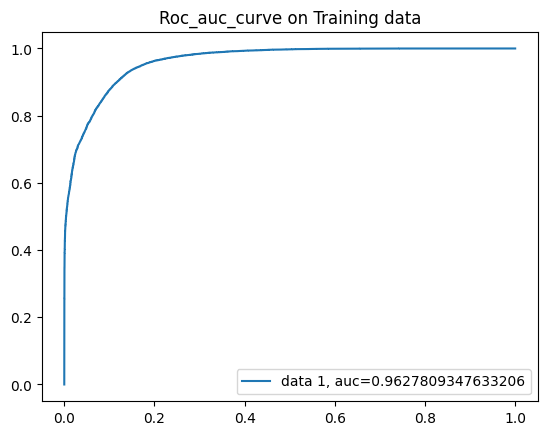

In [ ]:
# Roc_auc_curve
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_rf)

accuracy_score is 0.8105071688422855
 precision_score is 0.8390186915887851
recall_score is 0.7684570939439332
f1_score is 0.8021892103205629
roc_auc_score is 0.8105071688422855
confusion_matrix is [[3984  689]
 [1082 3591]]
classification_report is               precision    recall  f1-score   support

           0       0.79      0.85      0.82      4673
           1       0.84      0.77      0.80      4673

    accuracy                           0.81      9346
   macro avg       0.81      0.81      0.81      9346
weighted avg       0.81      0.81      0.81      9346



[[3984  689]
 [1082 3591]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

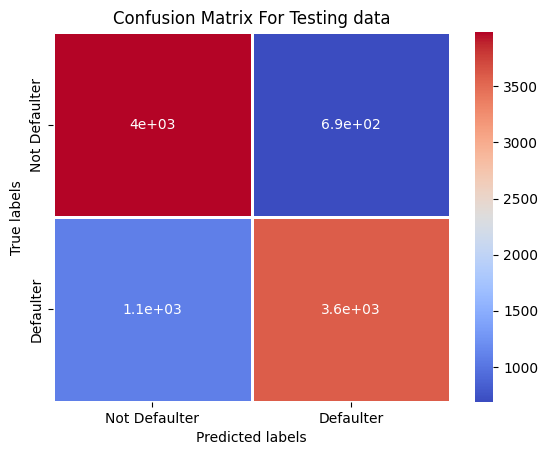

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

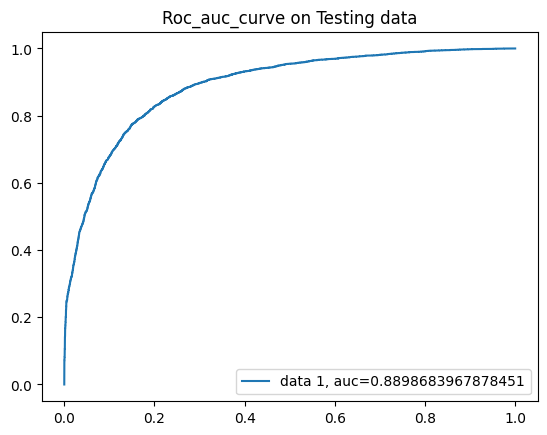

In [ ]:
# Roc_auc_curve
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

we have been implemented Random Forest and we getting accuracy_score is approx 86%. and recall_score is approx 82% and f1_score is 85% and ROC_AUC score is 86% ,precision score is approx 90% better parameter. Let's go ahead with other models and see if they can give better result

Implementing KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_knn)


accuracy_score is 0.8564014766465143
 precision_score is 0.8317975793196195
recall_score is 0.8934781445615537
f1_score is 0.8615352868345028
roc_auc_score is 0.8564014766465144
confusion_matrix is [[15314  3377]
 [ 1991 16700]]
classification_report is               precision    recall  f1-score   support

           0       0.88      0.82      0.85     18691
           1       0.83      0.89      0.86     18691

    accuracy                           0.86     37382
   macro avg       0.86      0.86      0.86     37382
weighted avg       0.86      0.86      0.86     37382



In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7840787502674941
 precision_score is 0.7599373409046407
recall_score is 0.8305157286539696
f1_score is 0.7936605316973416
roc_auc_score is 0.7840787502674942
confusion_matrix is [[3447 1226]
 [ 792 3881]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.74      0.77      4673
           1       0.76      0.83      0.79      4673

    accuracy                           0.78      9346
   macro avg       0.79      0.78      0.78      9346
weighted avg       0.79      0.78      0.78      9346



Implementing XG boost Algorithm

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [ ]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'),
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(X_train_os,y_train_os)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_os)
y_test_class_preds_xgb = xgb_grid.predict(X_test_os)

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_xgb)

accuracy_score is 0.7773259857685517
 precision_score is 0.8336229645362683
recall_score is 0.6929538280455835
f1_score is 0.7568072922753303
roc_auc_score is 0.7773259857685517
confusion_matrix is [[16106  2585]
 [ 5739 12952]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.86      0.79     18691
           1       0.83      0.69      0.76     18691

    accuracy                           0.78     37382
   macro avg       0.79      0.78      0.78     37382
weighted avg       0.79      0.78      0.78     37382



In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_xgb)

accuracy_score is 0.7733789856623154
 precision_score is 0.8289981972701519
recall_score is 0.6888508452814038
f1_score is 0.7524544179523142
roc_auc_score is 0.7733789856623156
confusion_matrix is [[4009  664]
 [1454 3219]]
classification_report is               precision    recall  f1-score   support

           0       0.73      0.86      0.79      4673
           1       0.83      0.69      0.75      4673

    accuracy                           0.77      9346
   macro avg       0.78      0.77      0.77      9346
weighted avg       0.78      0.77      0.77      9346



Conclusion We used diffent type of Classification algorithms to train our model like, Logistic Regression, Random Forest Classifier,KNN_Classifier, XGboost_Classifier. and Also we tuned the parameters of Random forest classifier and XGboost classifier ,KNN_ Out of them Random forest classifier ( tuned hyperparameters gave) the best result. it's Highest

Precision score is approx 90%,

Recall score is approx 82%

ROC_Auc score is approx 86%,

and Accuracy_score is approx 86%,

and It's F1_score approx is 85%